In [8]:
# 绘制e-variance的功能富集图
import pandas as pd
import numpy as np
import os
from scipy import stats
import matplotlib.pyplot as plt
Data = pd.read_csv("func_enrichment_pvalue.txt",
                   header=0, index_col=None, sep="\t")
                

In [11]:
Data

,type,stage,primaryCount,minorCount,nullCount,primaryTotal,minorTotal,nullTotal,primaryEnrichment,primaryPvalue,minorEcrichment,minorPvalue
0,exonic_SNP.txt,0DPA,614,80,931,8875,1465,27160,2.018274,5.958049e-41,1.593061,1.100979e-04
1,exonic_SNP.txt,4DPA,561,81,892,8734,1708,27264,1.963245,3.454086e-35,1.449512,1.778527e-03
2,exonic_SNP.txt,8DPA,624,92,920,9335,1639,27327,1.985521,2.309192e-39,1.667297,8.068596e-06
3,exonic_SNP.txt,12DPA,588,103,878,8775,1555,27405,2.091537,9.492271e-43,2.067484,7.468344e-11
4,exonic_SNP.txt,16DPA,529,87,892,7953,1234,28033,2.090400,9.941446e-40,2.215689,6.836205e-11
...,...,...,...,...,...,...,...,...,...,...,...,...
67,nonsynonymous_SNP.txt,4DPA,347,47,534,8734,1708,27264,2.028451,8.186925e-24,1.404942,3.204768e-02
68,nonsynonymous_SNP.txt,8DPA,379,58,586,9335,1639,27327,1.893299,1.650204e-21,1.650226,5.154875e-04
69,nonsynonymous_SNP.txt,12DPA,385,64,547,8775,1555,27405,2.198144,4.345460e-31,2.062016,3.996514e-07
70,nonsynonymous_SNP.txt,16DPA,310,46,572,7953,1234,28033,1.910312,3.269240e-19,1.826906,2.305522e-04


In [10]:
#* plotData
y_lab = [
    'promter',
    'TF_bind',
    'intergenic',
    'UTR5',
    'UTR3',
    'exonic',
    'intronic',
    'nonsynonymous',
    'synonymous',
    'stopgain',
]
primarySd = []
primaryAv = []
minorSd = []
minorAv = []
for i in y_lab:
    tmp1 = Data[Data['type'] == i+"_SNP.txt"]['primaryEnrichment']
    tmp2 = Data[Data['type'] == i+"_SNP.txt"]['minorEcrichment']
    primarySd.append(tmp1.std())
    primaryAv.append(tmp1.mean())
    minorSd.append(tmp2.std())
    minorAv.append(tmp2.mean())
    #! t_test
    tStat,pval=stats.ttest_ind(
        tmp1,tmp2
    )
    print(
        "{}:{},{}".format(i,tStat,pval)
    )

promter:2.426542877825444,0.035660406407463784
TF_bind:0.09833232145846489,0.9236115367435755
intergenic:-6.941988024589758,3.985681267003057e-05
UTR5:5.122050013186799,0.00044934609473093457
UTR3:3.19462294840417,0.009578695788352253
exonic:1.880794892895968,0.08940670106656068
intronic:4.509500075924044,0.0011264530419621394
nonsynonymous:2.732782497555601,0.021092431726783142
synonymous:1.9126504871962502,0.08483279064685274
stopgain:0.12939568803882626,0.8996102014098197


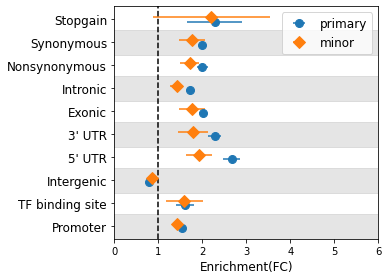

In [2]:


###########
# plot figure
###########
width = 0.2
fig, ax = plt.subplots(figsize=(5.5, 4))
y_axis = np.arange(len(y_lab))
ax.errorbar(
    primaryAv,
    y_axis-width/2,
    xerr=primarySd,
    markersize=8,
    linestyle='none',
    marker='o',
    label='primary'
)
ax.errorbar(
    minorAv,
    y_axis+width/2,
    xerr=minorSd,
    markersize=8,
    linestyle='none',
    marker='D',
    label='minor'
)

ax.axvline(x=1, color='black', linestyle='--')
# set coordinate
y_lab = [
    'Promoter',
    'TF binding site',
    'Intergenic',
    '5\' UTR',
    '3\' UTR',
    'Exonic',
    'Intronic',
    'Nonsynonymous',
    'Synonymous',
    'Stopgain',
]
ax.set_yticks(ticks=np.arange(0, 10))
ax.set_yticklabels(y_lab, fontsize=12)
plt.xticks(fontsize=10)
plt.xlim((0, 6))
plt.legend(fontsize=12)
plt.xlabel("Enrichment(FC)", fontsize=12)
# add the background
for i in np.arange(-0.56, 9., 2):
    ax.add_patch(plt.Rectangle(
                (-2, i),  # (x,y)矩形左下角
        12,  # width长
        1.08,  # height宽
        color='grey',
        alpha=0.2))
# 紧密排布
plt.tight_layout()
plt.savefig("enrichemnt.svg", dpi=600)
